Enter Stock Ticker : INFY.NS


[*********************100%***********************]  1 of 1 completed


RMSE: 24.34

Latest Close: ₹1428.80
Predicted Next Close: ₹1429.74
Expected Trend: Up


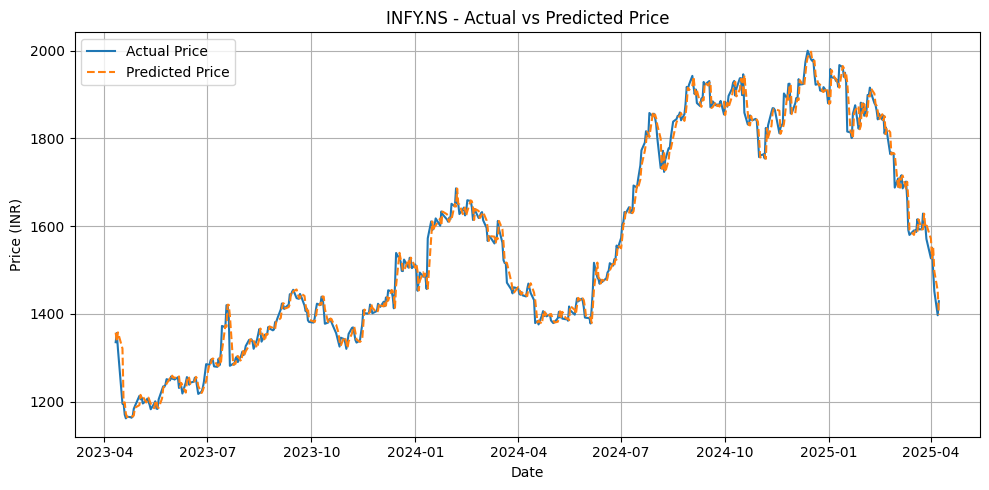

In [3]:
# Install packages
!pip install yfinance matplotlib scikit-learn --quiet

# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime

# Get User Input
ticker = input("Enter Stock Ticker : ")

#  Date Range (Last 2 years)
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=730)

#  Download Stock Data
data = yf.download(ticker, start=start_date, end=end_date)

#  Feature Engineering
data["Prev Close"] = data["Close"].shift(1)
data.dropna(inplace=True)

X = data[["Prev Close"]]
y = data["Close"]

#  Train Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

#  Evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"\nRMSE: {rmse:.2f}")

# Predict Next Day Price
latest_close = data["Close"].iloc[-1].item()
next_day_pred = model.predict(np.array(latest_close).reshape(1, -1))[0]
trend = "Up" if next_day_pred > latest_close else "Down"

print(f"\nLatest Close: ₹{latest_close:.2f}")
print(f"Predicted Next Close: ₹{next_day_pred.item():.2f}")
print(f"Expected Trend: {trend}")

#  Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(data.index, y, label='Actual Price')
plt.plot(data.index, y_pred, label='Predicted Price', linestyle='--')
plt.title(f"{ticker} - Actual vs Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()